## Investigate a Dataset

The data set used is "No show appointments": This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.


In [2]:
# importing the required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# uploading data

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv"
df = pd.read_csv(url)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Wrangling

In [4]:
# checking for missing values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Adjusting data type
# the content of the cells has letters that need to be removed

col= ["ScheduledDay", "AppointmentDay"]

for c in col:
    df[c] = df[c].str.replace("T", " ")
    df[c] = df[c].str.replace("Z", "")
    df[c] = pd.to_datetime(df[c]) 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# editing columns names
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap', 'No-show' : 'No_show'}, inplace = True)

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
# Changing Yes & No to 1 & 0
df["No_show"] = df["No_show"].replace({'Yes' : 1, 'No' : 0}).astype(int)

## Exploratory Data Analysis

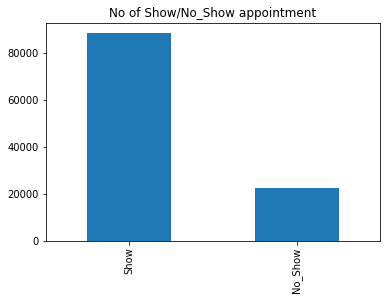

In [9]:
plot_1 = df['No_show'].value_counts().plot(kind = 'bar')
plot_1.set_xticklabels(["Show", "No_Show"])
plot_1.set_title("No of Show/No_Show appointment");

In [10]:
# splitting the data frame
df_1 = df[df["No_show"] == 1]
df_2 = df[df["No_show"] == 0]

### Age Distribution

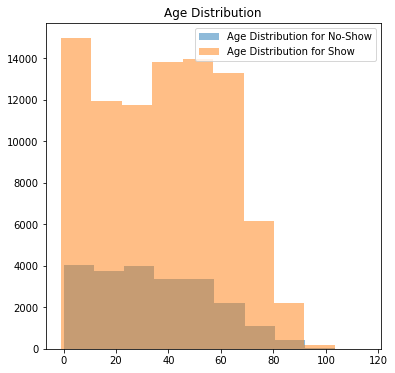

In [11]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,6))
ax.hist(df_1['Age'], alpha = .5, label = "Age Distribution for No-Show")
ax.hist(df_2['Age'], alpha = .5, label = "Age Distribution for Show")
ax.set_title('Age Distribution')
ax.legend(loc = 'upper right')
plt.show()

In [12]:
print('Average age for No_Show:', df_1["Age"].mean())
print('Average age for Show:', df_2["Age"].mean())

Average age for No_Show: 34.31766656212196
Average age for Show: 37.790064393252315


### Neighbourhood Analysis

In [13]:
# Exploring the Neighbourhood by calculating the percentage of no-show per neighbourhood

neigbourhoods = df["Neighbourhood"].unique()

# count of appointments per neighbourhood
neigbourhood_count = df["Neighbourhood"].value_counts()

# count of no show vaues
neigbourhood_no_show = df_1["Neighbourhood"].value_counts()

In [14]:
A = []
B = []
C = []
D = []

for c in neigbourhoods:
    A.append(c)
    try: b = neigbourhood_no_show[c] 
    except: b = 0
    B.append(b)
    C.append(neigbourhood_count[c])
    D.append(b/neigbourhood_count[c])
    
df_percentage_no_show = pd.DataFrame(A, columns = ["neigbourhood"])
df_percentage_no_show["count_no_show"] = B
df_percentage_no_show["count"] = C
df_percentage_no_show["percentage_no_show"] = D

df_percentage_no_show.head()

,neigbourhood,count_no_show,count,percentage_no_show
0,JARDIM DA PENHA,631,3877,0.162755
1,MATA DA PRAIA,110,644,0.170807
2,PONTAL DE CAMBURI,12,69,0.173913
3,REPÚBLICA,143,835,0.171257
4,GOIABEIRAS,137,700,0.195714


In [15]:
# previewing the top 10 neighbourhoods with no show percentage
df_percentage_no_show.nlargest(10, 'percentage_no_show')

,neigbourhood,count_no_show,count,percentage_no_show
79,ILHAS OCEÂNICAS DE TRINDADE,2,2,1.000000
43,SANTOS DUMONT,369,1276,0.289185
68,SANTA CECÍLIA,123,448,0.274554
39,SANTA CLARA,134,506,0.264822
34,ITARARÉ,923,3514,0.262664
62,JESUS DE NAZARETH,696,2853,0.243954
73,HORTO,42,175,0.240000
65,ILHA DO PRÍNCIPE,532,2266,0.234775
44,CARATOÍRA,591,2565,0.230409
5,ANDORINHAS,521,2262,0.230327


### Exploring Day of Week

In [26]:
# extracting the day of week
df["DayofWeek"] = df["AppointmentDay"].dt.dayofweek
df_1["DayofWeek"] = df_1["AppointmentDay"].dt.dayofweek

E:\Set-up\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


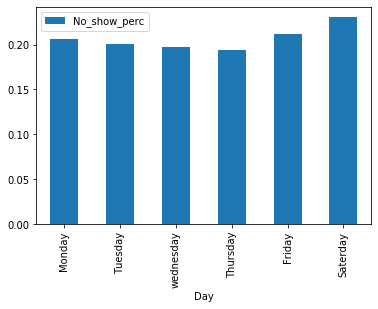

In [48]:
# calculating the percentage of No show per each day
Q = []
U = []
for day in np.arange(6):
    Q.append(day)
    U.append(df_1["DayofWeek"].value_counts()[day]/df["DayofWeek"].value_counts()[day])
    
app_per_day = pd.DataFrame(Q, columns = ["Day"])
app_per_day["No_show_perc"] = U

plot_2 = app_per_day.plot("Day", "No_show_perc", kind = 'bar')
plot_2.set_xticklabels(["Monday", "Tuesday", "wednesday", "Thursday", "Friday", "Saterday", "Sunday"]);

### Exploring Features

In [42]:
features_check = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

Z = []

for col in features_check:
    X = df_1[df[col] == 1]
    Y = df[df[col] == 1]
    Z.append(X.shape[0]/Y.shape[0])
    
    
    

Features = pd.DataFrame(features_check, columns = ['Feature'])
Features["No_Show_Perc_with_feature"] = Z

Features

E:\Set-up\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Feature,No_Show_Perc_with_feature
0,Scholarship,0.237363
1,Hypertension,0.173020
2,Diabetes,0.180033
3,Alcoholism,0.201488
4,Handicap,0.179236
5,SMS_received,0.275745
